
### Q1




(a)

In [20]:
import tensorflow as tf
import tensorflow_datasets as tfds

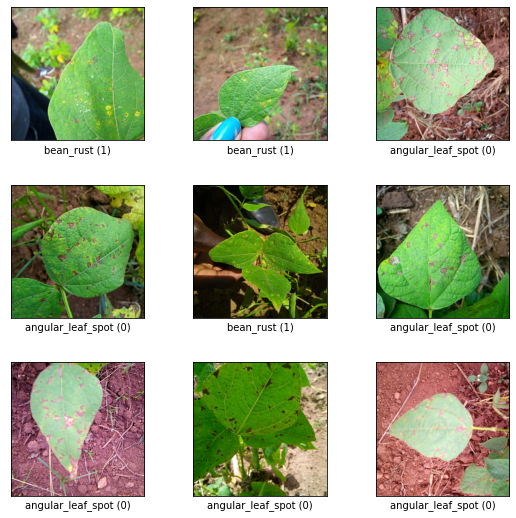

In [21]:
data, info = tfds.load('beans', split='train', with_info=True)

fig = tfds.show_examples(data, info)

The leaves with angular leaf spot seem to have lighter shades of green than the other ones and have spots all over the leaf. The leaves affected by bean rust seem to have yellow spots on them.

(b) Yes, the example can be used as a classification problem because there are two visible classes in the dataset, angular leaf spot and bean rust, with visible differences in the appearance of the leaves. Hence, we can use a classification model to train the model to classify the data in to these two classes.

In [22]:
#necessary libraries
import sklearn
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import array_to_img
from skimage.transform import resize

In [23]:
#dividing the data in images and labels
images, labels = [],[]

for image in data:
    images.append(image['image'].numpy())
    labels.append(image['label'].numpy())

np_images = np.array(images)
np_labels = np.array(labels)

del images
del labels

## (c), (d), (e)

## Proprocessing

In [24]:
#resizing the images array to a standard 100*100*3 = 30000 elements 2D array 
np_images = np.array([resize(x,(100, 100)) for x in np_images])

#flattening the images
dim1, dim2, dim3, dim4 = np_images.shape
flattened_np_images = np_images.reshape((dim1, dim2*dim3*dim4))

#normalizing the images
flattened_np_images=flattened_np_images/255.0



## Splitting

In [25]:
#splitting the images in a 3:2 ratio for train and test
x_train, x_test, y_train, y_test = train_test_split(flattened_np_images, np_labels, train_size=0.67)

print(flattened_np_images.shape)
print("Training Images: "+ str(len(x_train)))
print("Testing Images: "+ str(len(x_test)))

(1034, 30000)
Training Images: 692
Testing Images: 342


In [26]:
from skimage.io import imread
from skimage.io import imread, imshow
from sklearn.linear_model import LogisticRegression

In [27]:
LogReg = LogisticRegression(solver = 'lbfgs') #creating an instance of LogReg

LogReg.fit(x_train, y_train) #fitting the classifier

print(LogReg.score(x_test, y_test)) #checking accuracy score

0.6081871345029239


## Q2

In [28]:
def image_size(img):
  if len(img.shape) == 2:
    #return height, width, depth=0
    return (len(img),len(img[0]),0)
  else:
    return (len(img),len(img[0]),len(img[0][0]))
  
def filter_size(filter):
  #return heigth, width
  return (len(filter),len(filter[0]))

def update_pixel_value(input_image, filter,x,y ):
  dim_image = image_size(input_image) #dim_image[:] = height, width, depth
  dim_filter  = filter_size(filter) #dim_filter[:]= height, width
  
  c = int(y - (dim_filter[0] - 1)/2)
  r = int(x - (dim_filter[1] - 1)/2)

  size = dim_filter[0]*dim_filter[1]
    
  if dim_image[2] == 0:

    w = 0
    for d in range(0,dim_image[2]+1):
      j = 0
      while j < dim_filter[0]:
        i = 0
        while i < dim_filter[1]:
          w = w + (input_image[r+j][c+i])*filter[i][j]
          i = i+1
        j = j+1
        i = 0 
    rgb = int(w//size) 

  else:

    rgb = []
    w = 0
    for d in range(0, dim_image[2]):
      j = 0
      while j < dim_filter[0]:
        i = 0
        while i < dim_filter[0]:
          w = w + (input_image[r+j][c+i][d])*filter[i][j]
          i = i+1
        j = j+1
        i = 0

      new_pixel = int(w//size)
      rgb.append(new_pixel)

      w = 0
    
  return rgb

In [29]:
def filt(input_image, filter, padding, normalisation):
  dim_image = image_size(input_image)
  dim_filter  = filter_size(filter)
    
  x = dim_filter[1]//2
  y = dim_filter[0]//2
  
  if padding == False:    
    #creating array of zeroes
    if dim_image[2] == 0:
      s = (dim_image[0]-2*x,dim_image[1]-2*x)
      copy_img = np.zeros(s,dtype=int)
    else:
      s = (dim_image[0]-2*x,dim_image[1]-2*x,dim_image[2])
      copy_img = np.zeros(s,dtype=int)
    for i in range(x,dim_image[0] - x ):
      for j in range(y, dim_image[1] - y ):
        
        rgb = update_pixel_value(input_image,filter,i,j)
        copy_img[i-x][j-y]= rgb 

  elif padding == True:
    if dim_image[2] == 0:
      s = (dim_image[0]+2*x,dim_image[1]+2*x)
      new_img = np.zeros(s,dtype=int)
    else:
      s = (dim_image[0]+2*x,dim_image[1]+2*x,dim_image[2])
      new_img = np.zeros(s,dtype=int)
      #print(new_img.shape)
    for i in range(0,dim_image[0]):
      for j in range(0, dim_image[1]):
        rgb = input_image[i][j]
        new_img[i+x][j+y]=  rgb
    copy_img = filt(new_img,filter,False,0)


  if normalisation == False:
    return copy_img 
  else:
    means = copy_img.mean(axis = 0)  
    stddev = copy_img.std(axis = 0)
    #copy_img = (copy_img-means)/stddev
    copy_img = (copy_img)/255
    return copy_img

In [30]:
import random
from matplotlib import pyplot as plt 

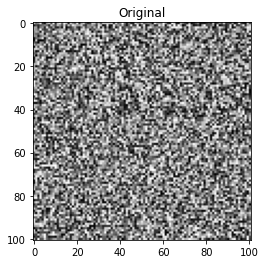

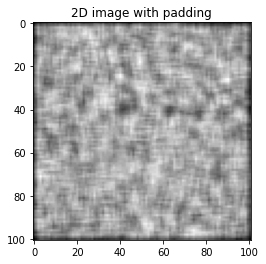

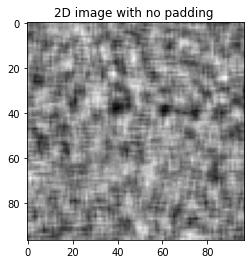

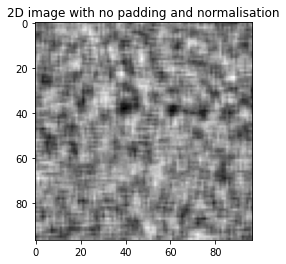

In [31]:
#making a 2D gray scale image
arr = []
for i in range (0,101):
  arr1 = []
  for j in range (0,101):
    arr1.append(random.randint(0, 255))
  arr.append(arr1)
img_2D = np.array(arr)
test_filter = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

#Original image
img = img_2D
plt.title('Original')
plt.imshow(img,cmap = 'gray')
plt.figure()

#for a 2D image with padding 
img = img_2D
img = filt(img, test_filter,True,False)
plt.title('2D image with padding')
plt.imshow(img,cmap = 'gray')
plt.figure()

#for a 2D image with no padding 
img = img_2D
img = filt(img, test_filter,False,False)
plt.title('2D image with no padding ')
plt.imshow(img,cmap = 'gray')
plt.figure()

#for a 2D image with no padding and normalisation
img = img_2D
img = filt(img, test_filter,False,True)
plt.title('2D image with no padding and normalisation')
plt.imshow(img,cmap = 'gray')


## Q3

In [32]:
from skimage.feature import hog
from sklearn.svm import LinearSVC

In [33]:
x_train, x_test, y_train, y_test = train_test_split(np_images, np_labels, train_size=0.67)

In [34]:
print('x_train =',x_train.shape ,', y_train =',y_train.shape) 
print('x_test =',x_test.shape ,', y_test =',y_test.shape)

x_train = (692, 100, 100, 3) , y_train = (692,)
x_test = (342, 100, 100, 3) , y_test = (342,)


In [35]:
normalize = True                                   
block_norm = 'L2-Hys'      
orientations = 9           
pixels_per_cell = [8, 8]
cells_per_block = [2, 2]   

def featureExtraction(img, vis=False):
    return hog(img, orientations, pixels_per_cell, cells_per_block, block_norm, visualize = vis, transform_sqrt=normalize)

x_train_hog = np.array([featureExtraction(x_train[i]) for i in range(692)])
x_test_hog = np.array([featureExtraction(x_test[i]) for i in range(342)])

lsvc = LinearSVC()
lsvc.fit(x_train_hog, y_train.ravel())
print("Accuracy: ",lsvc.score(x_test_hog, y_test)*100)

Accuracy:  50.29239766081871
